<a href="https://colab.research.google.com/github/ApurbaPaul-NLP/Machine-Learning/blob/main/29_08_2022_Project_on_Using_CNN_Fashion_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U tensorflow_datasets
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import math
import logging
logger=tf.get_logger()
logger.setLevel(logging.ERROR)

In [2]:
dataset,metadata=tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset=dataset['train']
test_dataset=dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteBL1MDV/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteBL1MDV/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
class_names=metadata.features['label'].names
print('Class names:{}'.format(class_names))

Class names:['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
num_train_examples =metadata.splits['train'].num_examples
num_test_examples=metadata.splits['test'].num_examples
print('Number of Training Examples: {}'.format(num_train_examples))
print('Number of Test examples:{}'.format(num_test_examples))

Number of Training Examples: 60000
Number of Test examples:10000


In [7]:
def normalize(images,labels):
  images=tf.cast(images,'float32')
  images=images/255
  return images,labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset  = test_dataset.cache()

In [9]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
])

In [10]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [11]:
BATCH_SIZE = 32
train_dataset=train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset=test_dataset.cache().batch(BATCH_SIZE)

In [12]:
model.fit(train_dataset,epochs=10,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 22s 3ms/step - loss: 0.4079 - accuracy: 0.8520
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2614 - accuracy: 0.9038
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2184 - accuracy: 0.9195
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1858 - accuracy: 0.9320
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1566 - accuracy: 0.9429
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1351 - accuracy: 0.9504
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1161 - accuracy: 0.9575
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0983 - accuracy: 0.9639
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0831 - accuracy: 0.9693
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.07

In [14]:
test_loss, test_accuracy=model.evaluate(test_dataset,steps=math.ceil(num_train_examples/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)


1875/1875 [==============================] - 2s 963us/step - loss: 0.3290 - accuracy: 0.9170
Accuracy on test dataset: 0.9169999957084656


In [15]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [16]:
np.argmax(predictions[0])

4

In [17]:
test_labels[0]

4

In [18]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

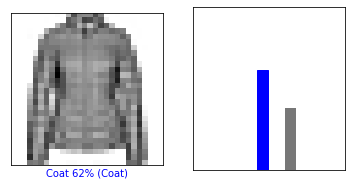

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

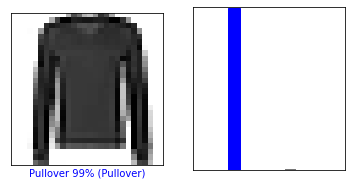

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

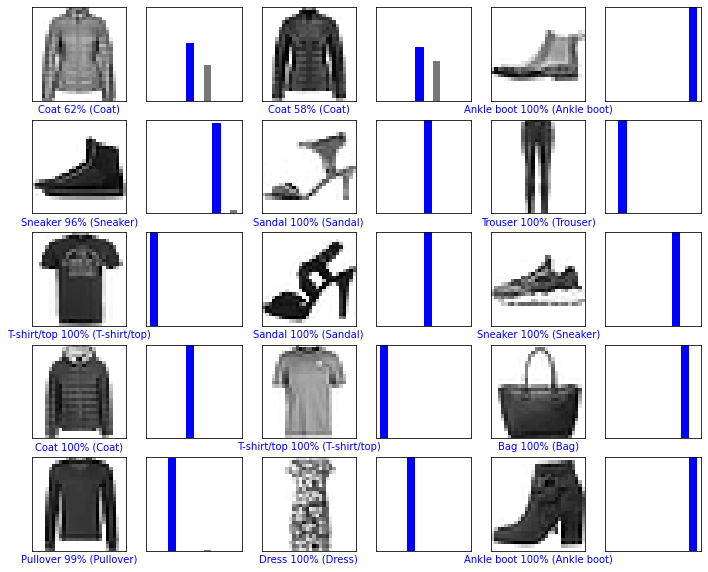

In [21]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [22]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [23]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [24]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.1049387e-07 2.6285146e-10 3.1337081e-03 1.7985930e-11 6.1584306e-01
  3.4104117e-10 3.8102311e-01 8.6018981e-14 2.6131880e-10 2.1825699e-08]]


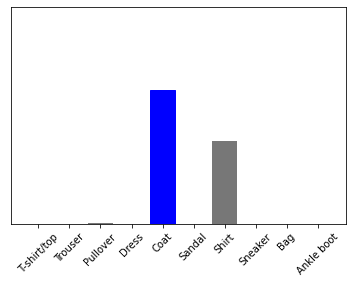

In [25]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [26]:
np.argmax(predictions_single[0])

4